<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/Logo_INSAvilletoulouse-RVB.png" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Initiation to PCA with <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>
#### Summary
This is an adaptation of the notebook 
https://github.com/wikistat/Exploration/blob/master/TutosRudim/Cal1-R-SVDtoACP.ipynb
[Analyse en Composantes Principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf). We do a PCA of a dataset composed of monthly temperature data of 36 French cities, with the R package [`FactoMineR`](http://factominer.free.fr/).

#### Note
As you can see, all the R code is given. The focus is on the statistical analysis.
Answer to the questions marked: **Q**.

## PCA of temperature curves
The dataset is contained in the file `tempR.dat` available on the same repository as the notebook. 
It contains the montly temperature, averaged from 1931 to 1960, of 36 French cities. The first variable is the city name (4 characters), and the 12 next represent a month (source: Mémorial de la Météorologie nationale). 

### Elementary exploration

In [3]:
# data loading
temp <- read.table("tempR.dat")
# verifications and elementary statistics
summary(temp)
head(temp)
shape(temp)

      janv            fevr            mars             avri       
 Min.   :0.400   Min.   :1.500   Min.   : 5.500   Min.   : 8.900  
 1st Qu.:2.075   1st Qu.:3.125   1st Qu.: 6.875   1st Qu.: 9.675  
 Median :3.450   Median :4.250   Median : 7.700   Median :10.400  
 Mean   :3.836   Mean   :4.678   Mean   : 8.014   Mean   :10.772  
 3rd Qu.:5.525   3rd Qu.:6.000   3rd Qu.: 9.375   3rd Qu.:11.700  
 Max.   :8.600   Max.   :9.100   Max.   :11.300   Max.   :13.900  
      mai             juin            juil            aout      
 Min.   :11.60   Min.   :14.40   Min.   :15.60   Min.   :16.00  
 1st Qu.:13.30   1st Qu.:16.57   1st Qu.:18.40   1st Qu.:18.12  
 Median :13.90   Median :17.20   Median :19.10   Median :18.75  
 Mean   :14.25   Mean   :17.61   Mean   :19.61   Mean   :19.32  
 3rd Qu.:14.90   3rd Qu.:18.55   3rd Qu.:20.75   3rd Qu.:20.30  
 Max.   :17.10   Max.   :21.10   Max.   :23.80   Max.   :23.30  
      sept            octo            nove             dece      
 Min.   :1

,janv,fevr,mars,avri,mai,juin,juil,aout,sept,octo,nove,dece
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2
bord,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2


ERROR: Error in shape(temp): impossible de trouver la fonction "shape"


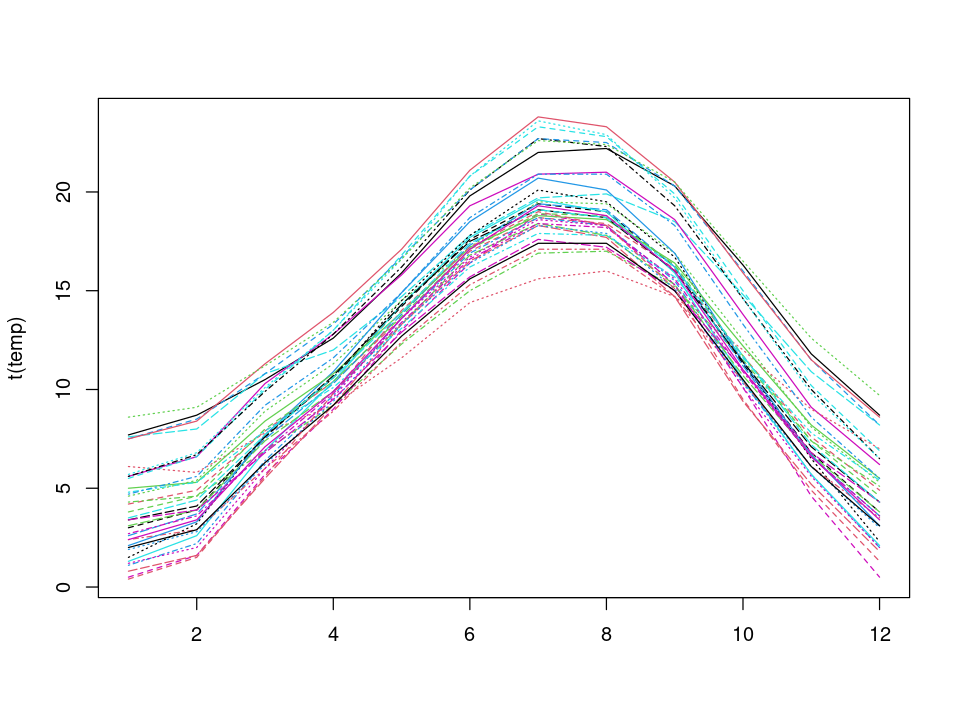

In [78]:
# Plot
options(repr.plot.width = 8, repr.plot.height = 6)
matplot(t(temp), type = "l")

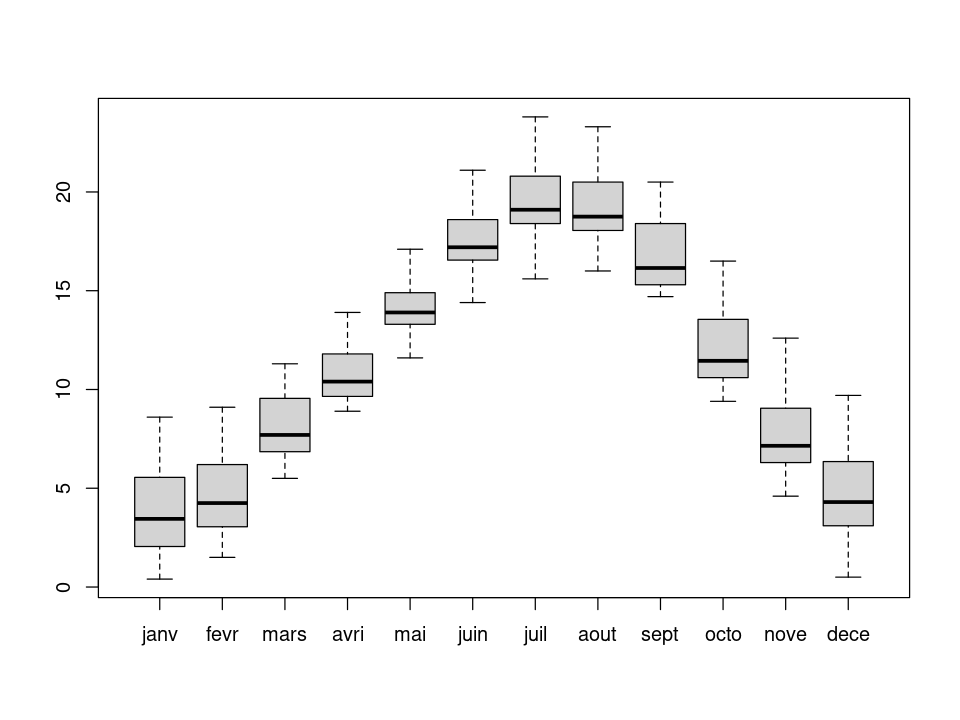

In [79]:
# Boxplots
boxplot(temp)

In [80]:
as.table(apply(temp,2,sd))

    janv     fevr     mars     avri      mai     juin     juil     aout 
2.251876 2.146507 1.722980 1.456142 1.404788 1.708791 1.992611 1.934368 
    sept     octo     nove     dece 
1.910479 2.037568 2.097275 2.282042 

**Q** What can you say about the distributions (position, dispersion, symmetry)?

Position: la médiane est la plus haute lorsque nous sommes en été. Et elle est basse quand nous sommes en hiver. Mais on dira que la différence est minime.



Dispersion (intervalle interquartile): On voit que la dispersion n'est pas constante, en effet les températures ont une plus large étendue en hiver qu'au printemps/automne. Cela marque notamment les jours doux que nous pouvons avoir en hiver



Symmétrie: on remarque que la distribution n'est pas symétrique car l'intervalle entre le 1er quartile et médiane est toujours plus petite que la distance entre le 3e quartile et la médiane

Unité homogène : températures toutes en degré celsius



**Q** Consequence for PCA: should we scale the data before doing a PCA? 
ACP non réduit va avoir une différence avec une ACP réduit? --> NON

In [81]:
# Correlations
cor(temp)

,janv,fevr,mars,avri,mai,juin,juil,aout,sept,octo,nove,dece
janv,1.0000000,0.9885360,0.9199117,0.7825097,0.5995795,0.5663280,0.5398900,0.6296871,0.7907821,0.9276428,0.9753371,0.9948352
fevr,0.9885360,1.0000000,0.9618949,0.8561302,0.6982284,0.6687648,0.6460014,0.7275281,0.8662304,0.9676484,0.9905985,0.9850215
mars,0.9199117,0.9618949,1.0000000,0.9462747,0.8280143,0.8042627,0.7810710,0.8446493,0.9370059,0.9716271,0.9574533,0.9154278
avri,0.7825097,0.8561302,0.9462747,1.0000000,0.9613805,0.9438164,0.9253098,0.9566592,0.9780987,0.9292199,0.8715025,0.7871887
mai,0.5995795,0.6982284,0.8280143,0.9613805,1.0000000,0.9905124,0.9830884,0.9841428,0.9456148,0.8267931,0.7332866,0.6120187
juin,0.5663280,0.6687648,0.8042627,0.9438164,0.9905124,1.0000000,0.9917333,0.9863038,0.9350057,0.8037035,0.7043545,0.5790681
juil,0.5398900,0.6460014,0.7810710,0.9253098,0.9830884,0.9917333,1.0000000,0.9901252,0.9308617,0.7934865,0.6847357,0.5520168
aout,0.6296871,0.7275281,0.8446493,0.9566592,0.9841428,0.9863038,0.9901252,1.0000000,0.9690372,0.8596967,0.7619311,0.6406010
sept,0.7907821,0.8662304,0.9370059,0.9780987,0.9456148,0.9350057,0.9308617,0.9690372,1.0000000,0.9566552,0.8911815,0.7968598
octo,0.9276428,0.9676484,0.9716271,0.9292199,0.8267931,0.8037035,0.7934865,0.8596967,0.9566552,1.0000000,0.9805347,0.9301548


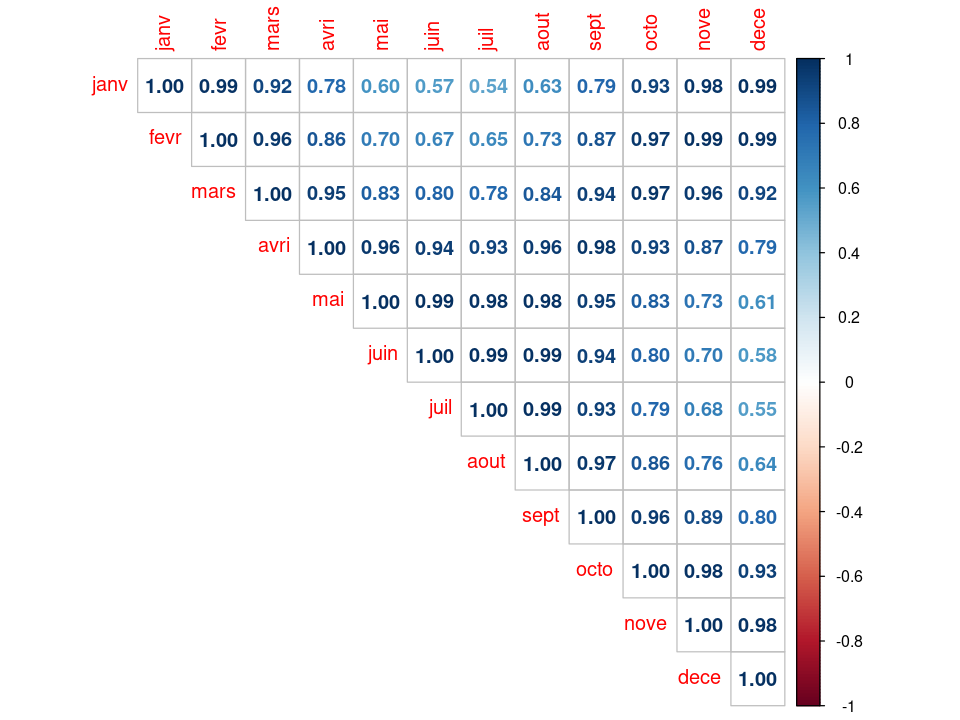

In [82]:
library(corrplot)
M=cor(temp)
corrplot(M,method="number",type="upper")

Installation du package dans ‘/home/lobeto/R/libs’
(car ‘lib’ n'est pas spécifié)



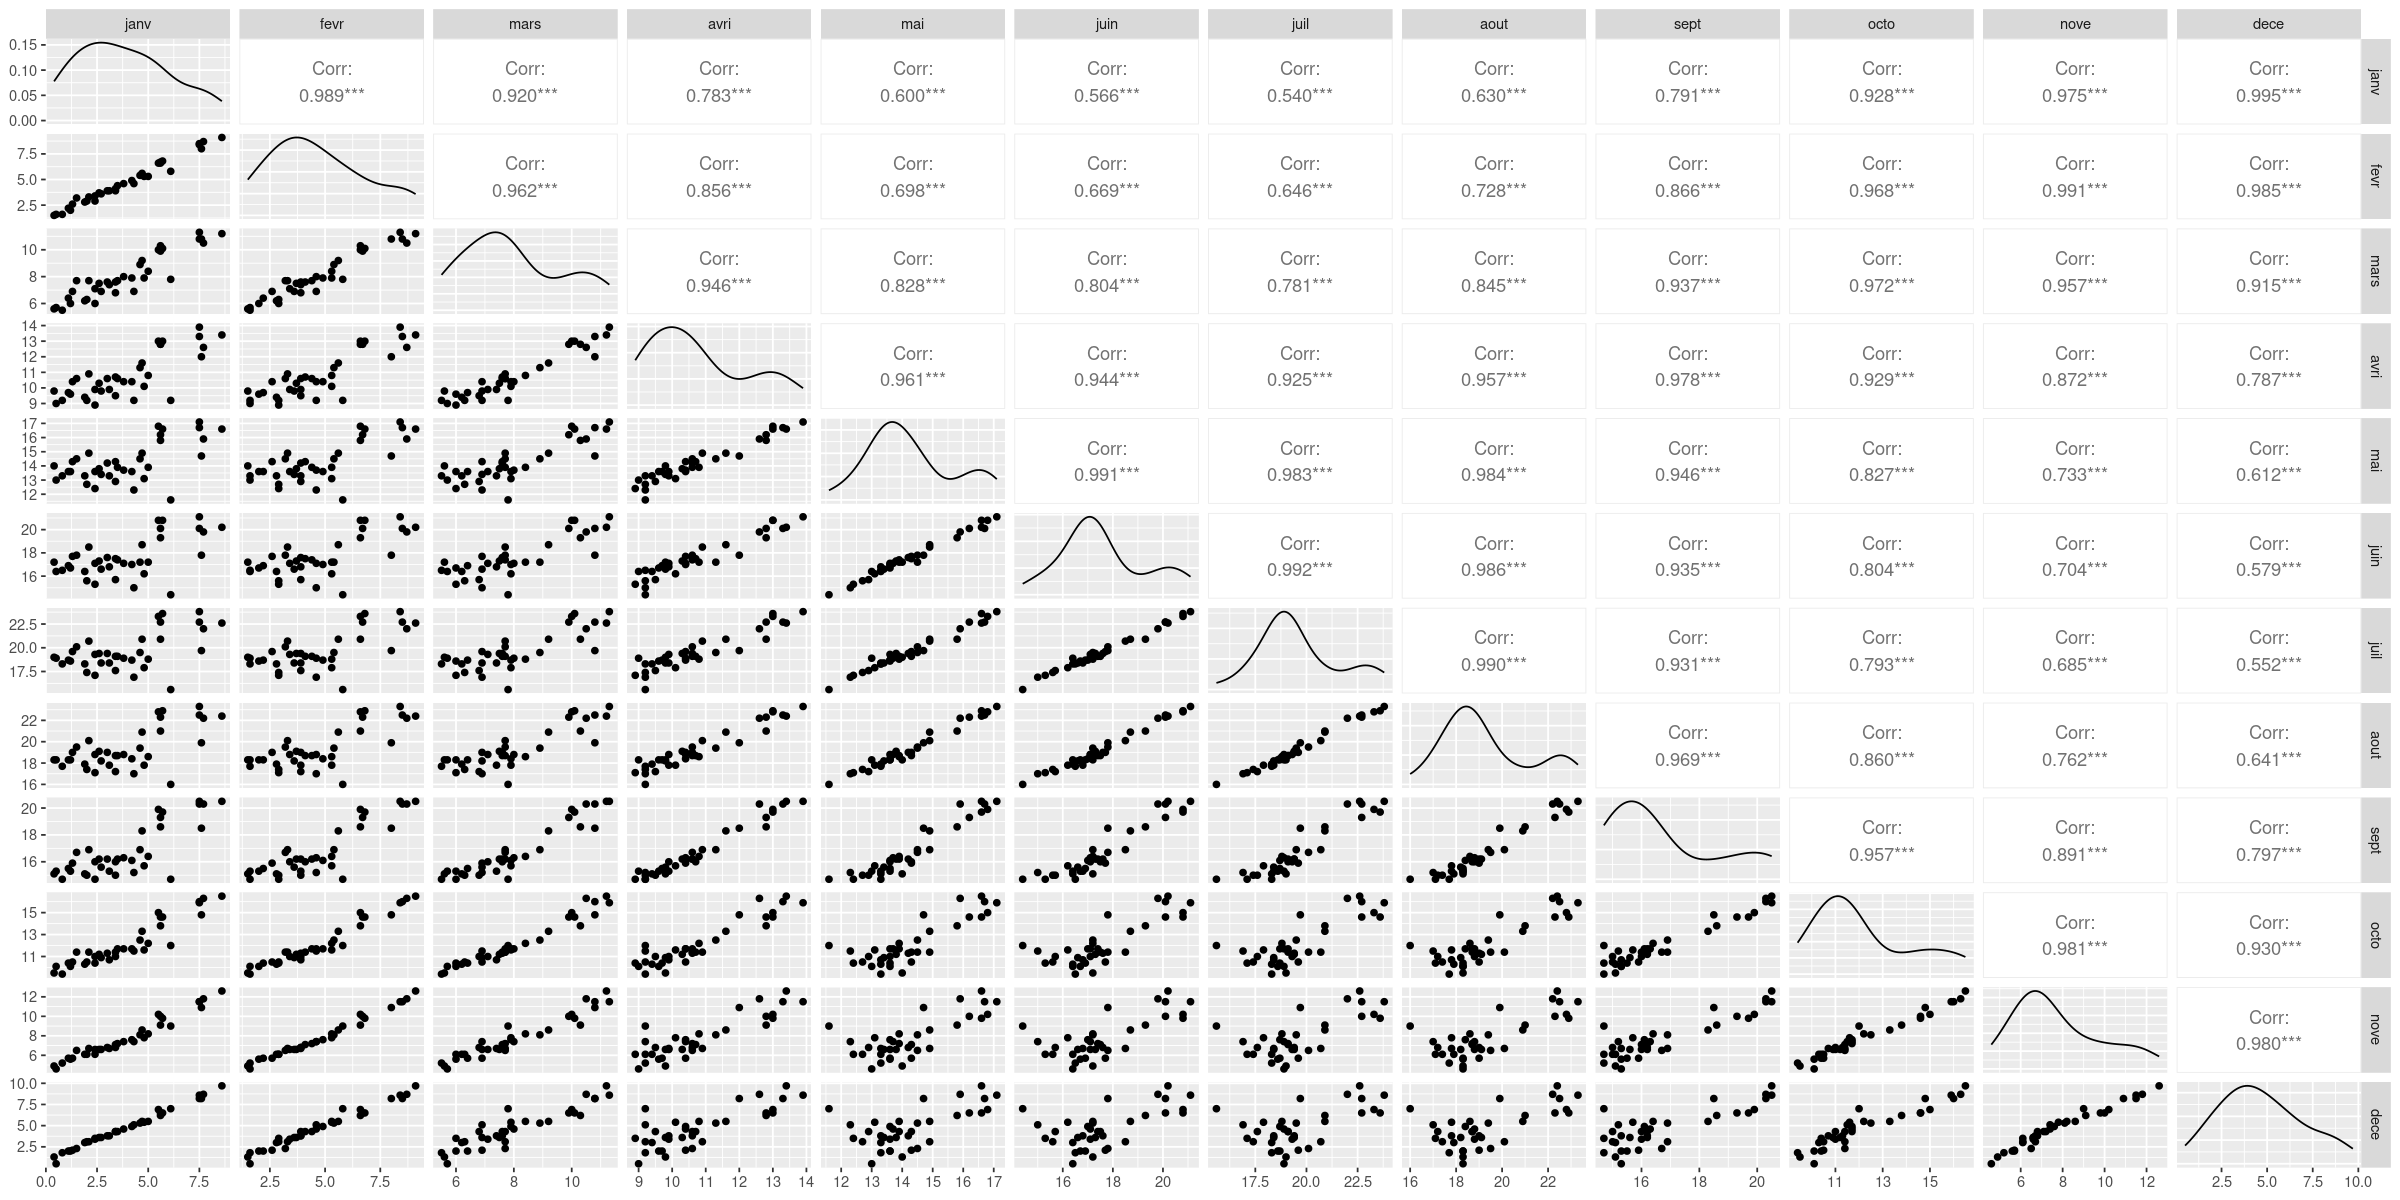

In [83]:
install.packages("GGally")
library(GGally)
options(repr.plot.width=20,repr.plot.height=10)
ggpairs(temp)

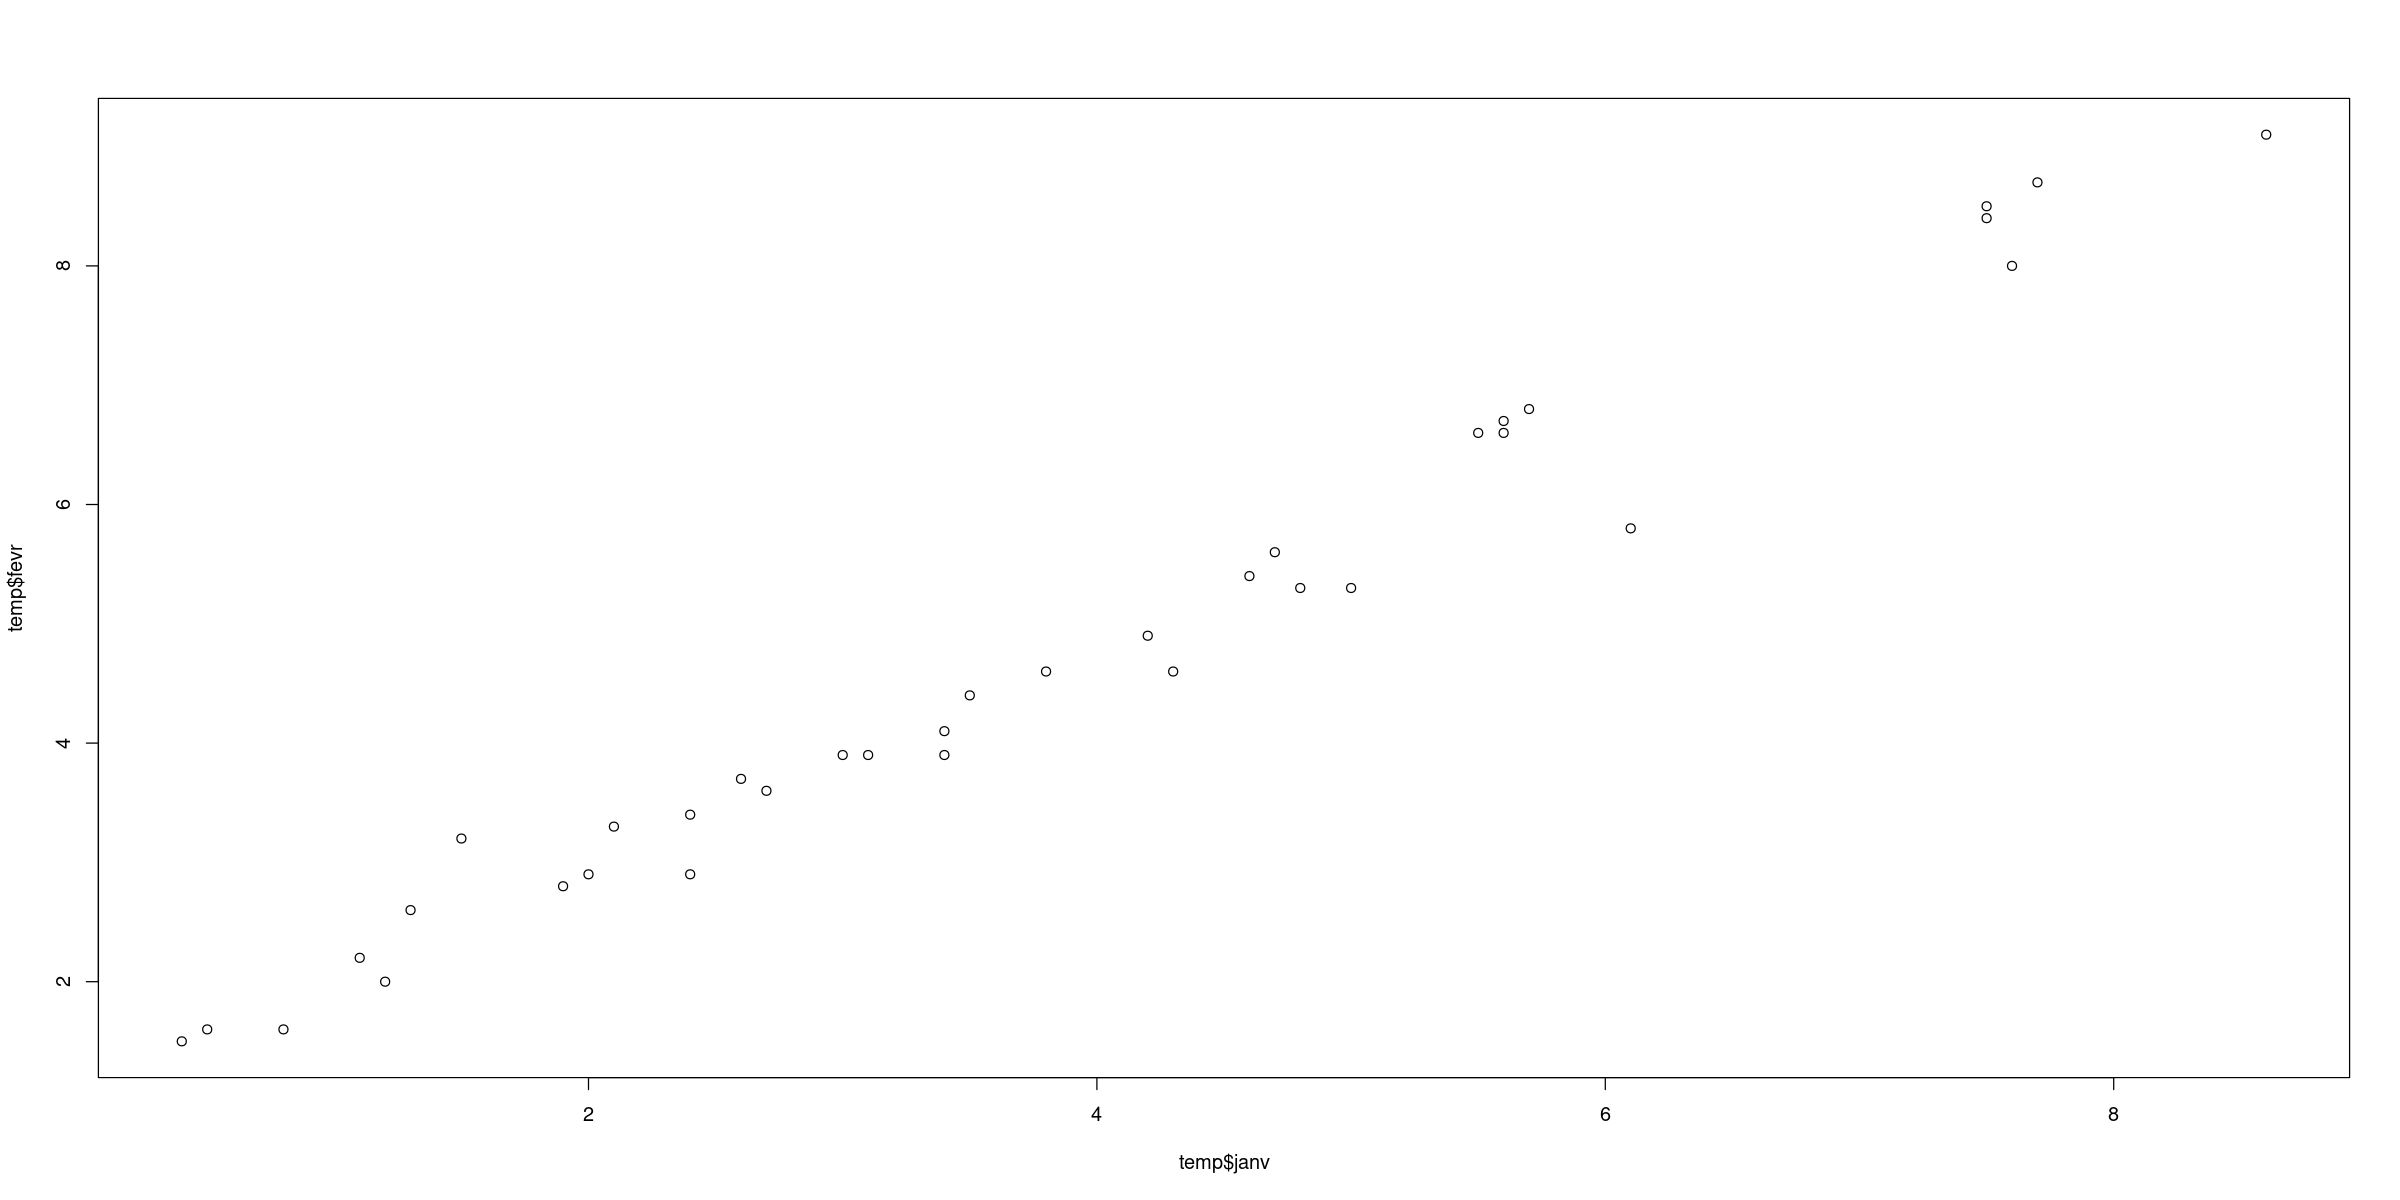

In [84]:
plot(temp$janv, temp$fevr)

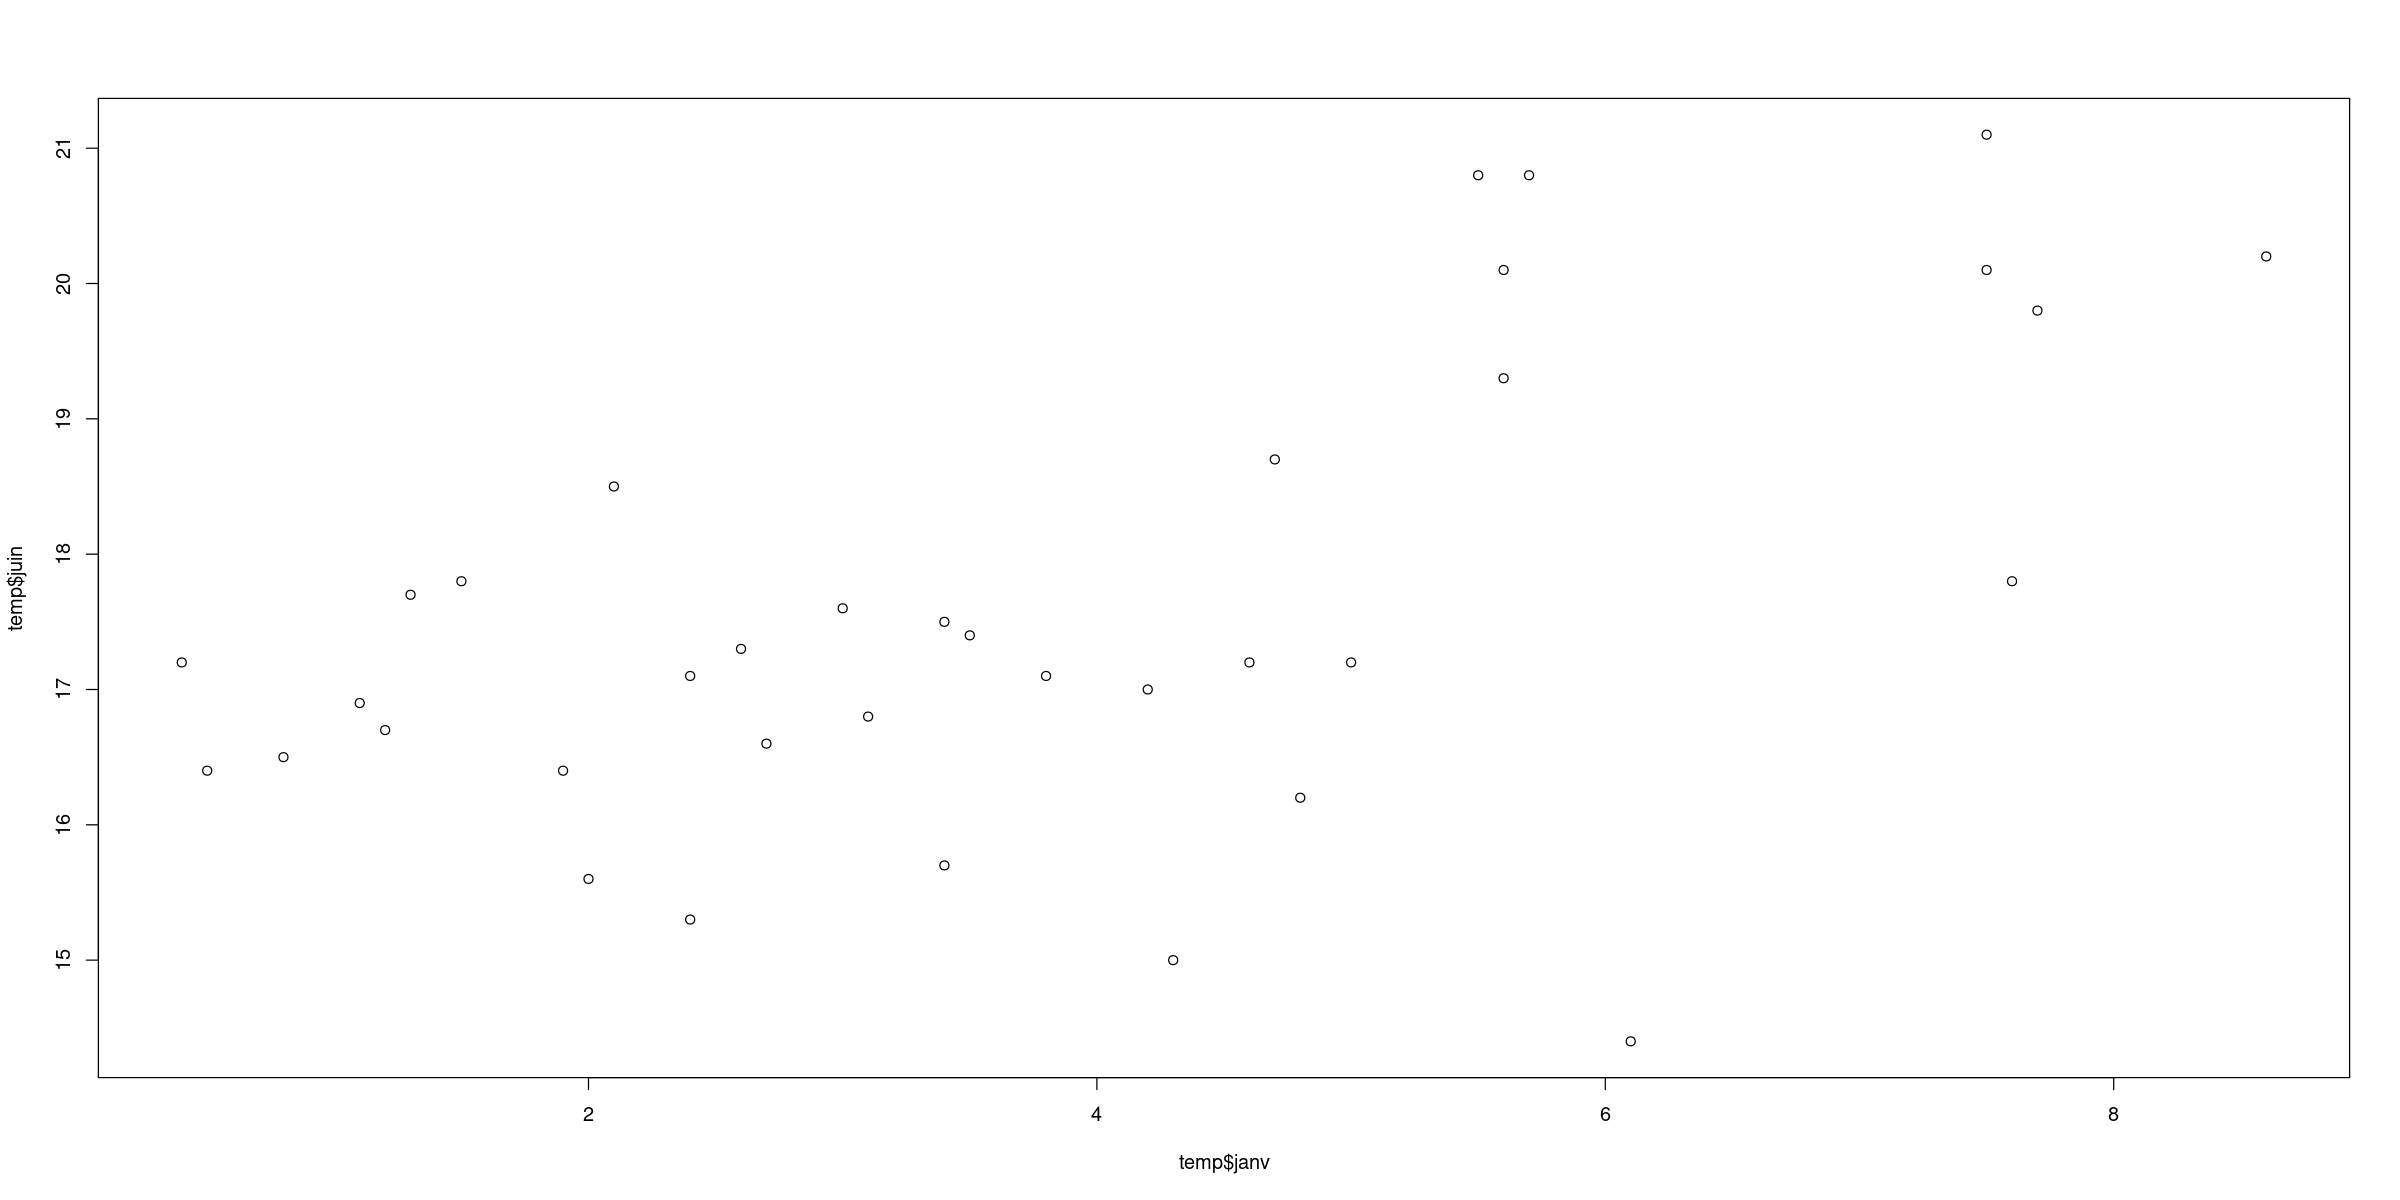

In [85]:
plot(temp$janv, temp$juin)

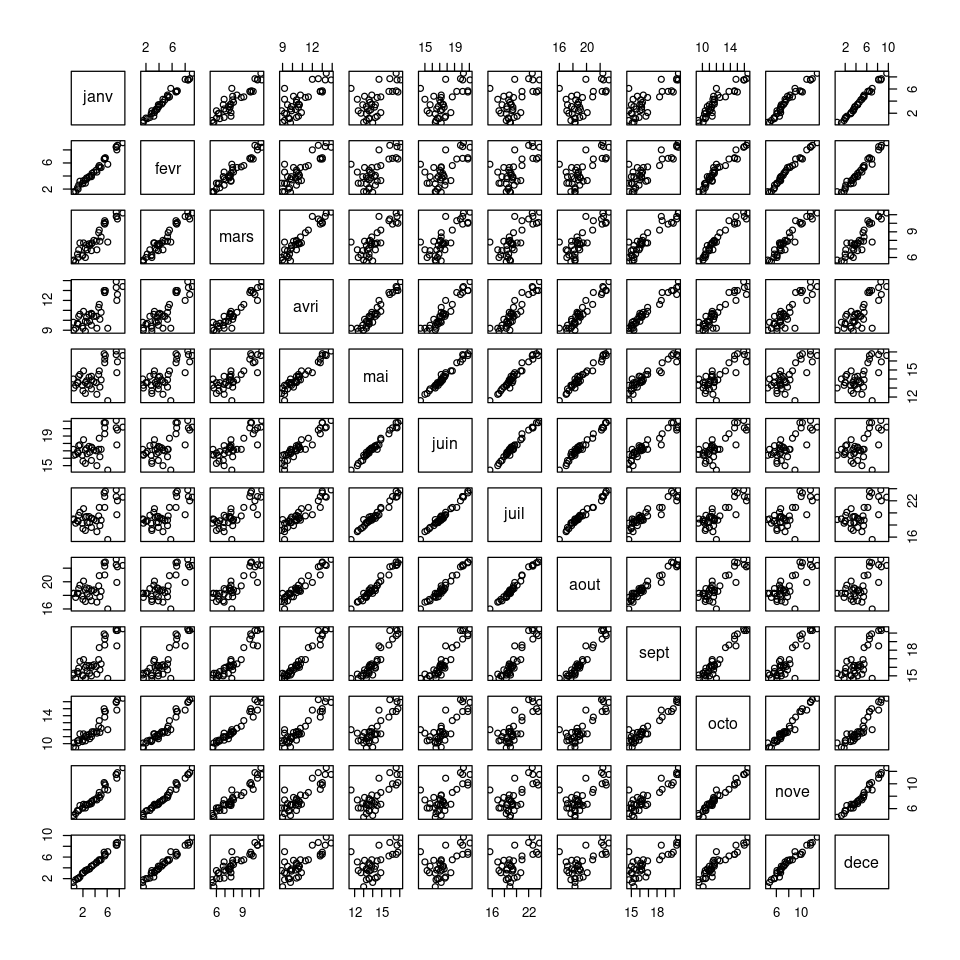

In [86]:
options(repr.plot.width=8, repr.plot.height=8)
pairs(temp)

**Q** Comment this correlation structure. Consequence for dimension reduction?

### PCA with the R package FactoMineR

FactoMineR has many nice functionalities for PCA. 
Mind however that it also gives statistical results, such as *p*-values of statistical tests or confidence ellipsoids, that should be used with care. Indeed, they are based on an implicit assumption of a Gaussian probabilistic model, which may not be verified. We do not use them here.

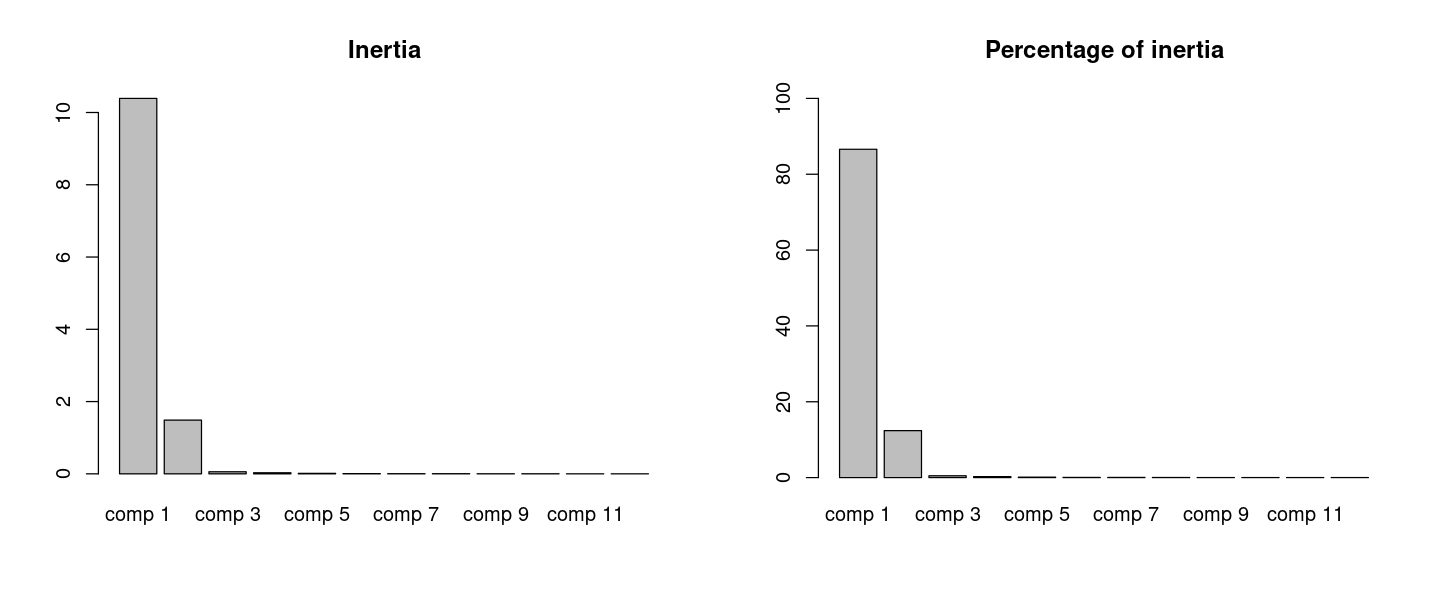

In [4]:
library(FactoMineR)
# PCA with FactoMineR
acp <- PCA(temp, scale.unit = TRUE, ncp = 12, graph = F)
options(repr.plot.width = 12, repr.plot.height = 5)
# barplot of the inertias and percentage of inertia associated to each principal component
par(mfrow = c(1, 2))
barplot(acp$eig[, 1], main = "Inertia")
barplot(acp$eig[, 2], ylim = c(0, 100), main = "Percentage of inertia")

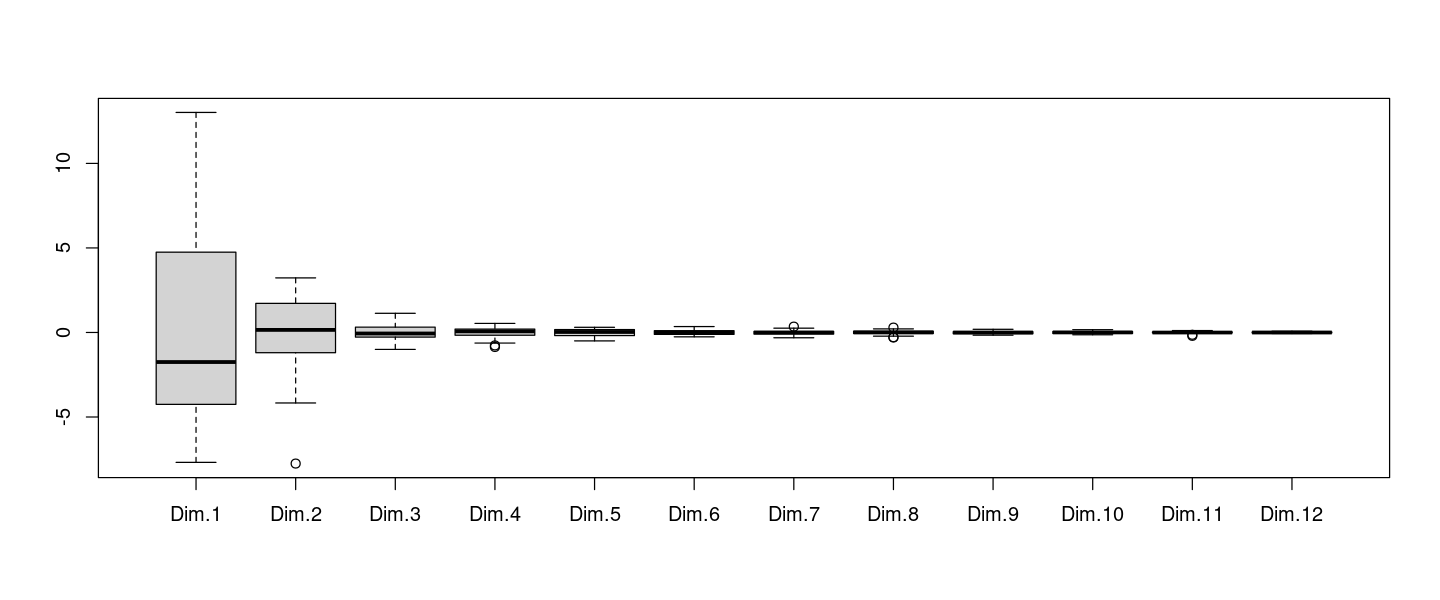

In [88]:
# Distribution of individual coordinates on the principal axes (the "principal components")
boxplot(acp$ind$coord)

In [89]:
acp <- princomp(temp,cor=FALSE)
summary(acp)


Importance of components:
                          Comp.1    Comp.2      Comp.3      Comp.4       Comp.5
Standard deviation     6.1292231 2.3611727 0.414769565 0.326941649 0.2069276866
Proportion of Variance 0.8628821 0.1280549 0.003951431 0.002455167 0.0009835078
Cumulative Proportion  0.8628821 0.9909369 0.994888371 0.997343539 0.9983270463
                             Comp.6       Comp.7       Comp.8       Comp.9
Standard deviation     0.1520441653 0.1321092258 0.1188580102 0.0895782803
Proportion of Variance 0.0005309824 0.0004008731 0.0003244872 0.0001843088
Cumulative Proportion  0.9988580287 0.9992589018 0.9995833889 0.9997676977
                            Comp.10      Comp.11      Comp.12
Standard deviation     0.0745158116 5.859145e-02 3.358871e-02
Proportion of Variance 0.0001275374 7.885134e-05 2.591357e-05
Cumulative Proportion  0.9998952351 9.999741e-01 1.000000e+00

**Q** Recall the interpretation of inertia in terms of variance. Then, what is the link between the two graphs above?




**Q** How many axes should we keep? Justify.  
On garde deux axes car ils résument 99% de l'information


Let us now interpret the eigenvectors defining the principal axis.


Critère de Kayson ou de Coude:
Regarder où il y a le coude et prendre ce nombre de compo principales

2e méthode: au moins 75% de cumulation proportion. On voit que la compo2 a 0.99 de proportion cumulée donc on est tranquille.



In [90]:
# Orthogonal matrix P whose columns contain the eigenvectors of the PCA
P <- acp$svd$V
P
t(P) %*% P

NULL

ERROR: Error in t.default(P): l'argument n'est pas une matrice


Here the data are ordered, hence we can visualize the eigenvectors as functions.

Warning message in min(x):
“aucun argument trouvé pour min ; Inf est renvoyé”
Warning message in max(x):
“aucun argument pour max ; -Inf est renvoyé”


ERROR: Error in plot.window(...): 'xlim' nécessite des valeurs finies


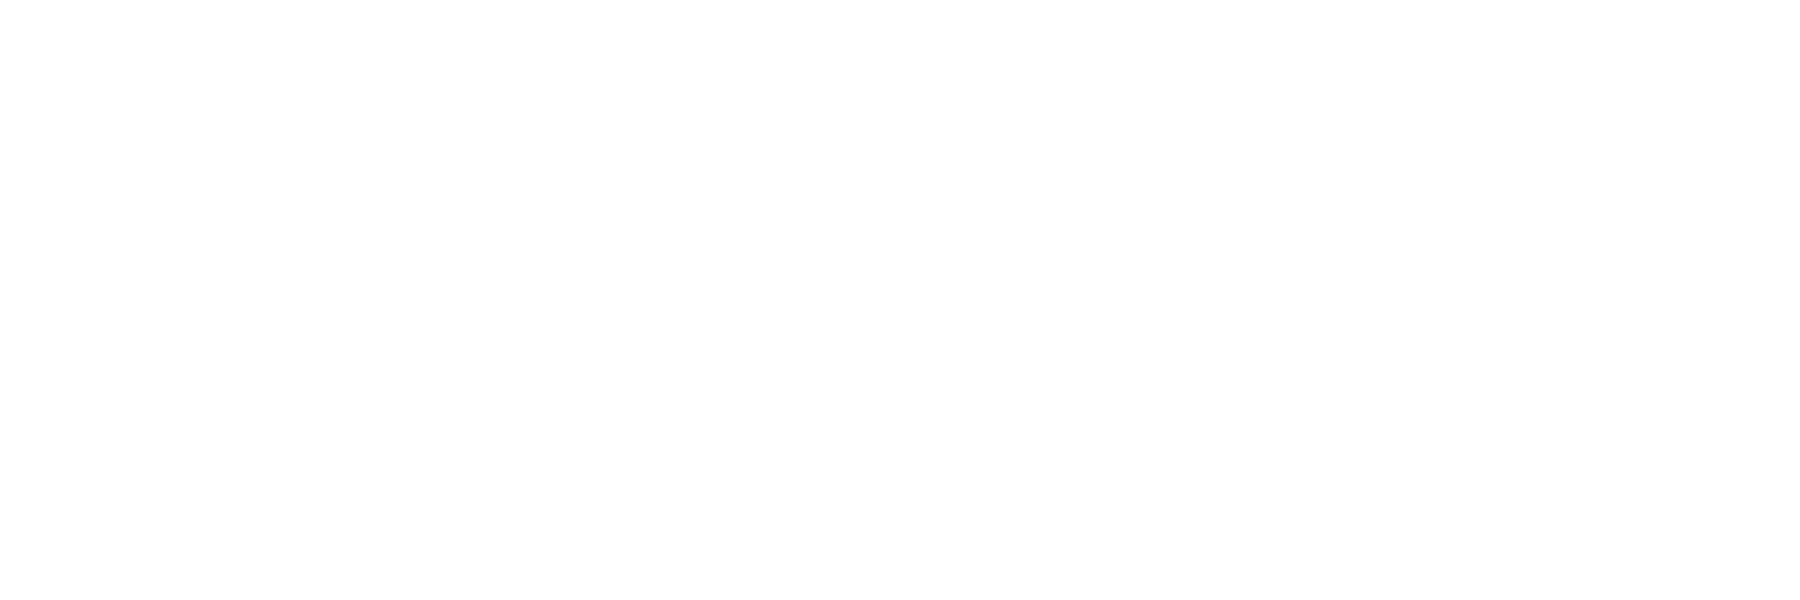

In [75]:
options(repr.plot.width = 15, repr.plot.height = 5)
par(mfrow = c(1, 4))
for (i in 1:4){
    plot(acp$svd$V[, i], type = "o", main = paste("Comp. ", i), xlab = "Time", ylab = "",
         ylim = c(-0.6, 0.6), col = "blue")
    abline(h = 0, lty = "dotted")
}

**Q** Interpret the first 2 principal axis

L'axe 1 indicateur de température globale
L'axe 2 serait un indicateur de la saison: mois chauds corrélés négativement et mois froids positivement

**Q** We plot below the "principal components", i.e. the coordinates of the individuals in the eigenvector basis (matrix C = XP). Can you confirm your interpretation?

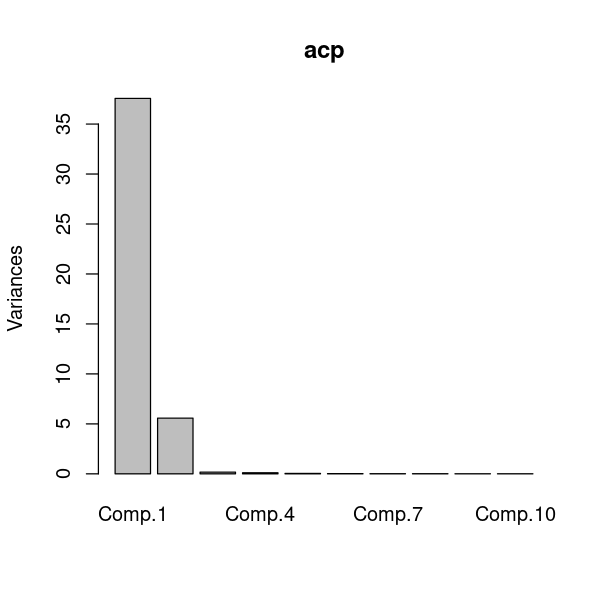

In [72]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(acp)

**Q** We print below the principal components. Check the consistency with the previous graph.

In [73]:
# printing of principal components (rows of the matrix C = XP)
acp$ind$coord

NULL

Let us check that the principal variables (column of C) are orthogonal and with squared norm = inertia

In [5]:
cov(acp$ind$coord)
n <- nrow(temp)
# note that by default the covariance uses a normalization of n-1 instead of n
cbind(norm2 = diag(cov(acp$ind$coord)) * (n-1) / n, 
      inertia = acp$eig[, 1])

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
Dim.1,1.068719e+01,6.091822e-17,7.837930e-17,-5.531328e-17,-3.264223e-17,1.565704e-18,-1.669729e-17,-9.582024e-18,1.049934e-18,-5.292601e-18,-1.228123e-17,1.642082e-18
Dim.2,6.091822e-17,1.529566e+00,4.624180e-17,2.645453e-18,-1.128751e-17,1.083539e-17,-6.377142e-18,-2.771540e-18,7.813371e-18,-3.042131e-18,-3.441555e-18,2.108797e-18
Dim.3,7.837930e-17,4.624180e-17,5.967322e-02,4.923875e-18,8.253005e-19,3.254180e-18,-3.611192e-18,-4.030243e-18,2.670320e-18,-5.859320e-18,-3.284757e-18,-4.919507e-19
Dim.4,-5.531328e-17,2.645453e-18,4.923875e-18,3.165870e-02,1.179326e-17,-1.720445e-19,-3.255329e-18,1.445894e-18,-2.014154e-18,3.350620e-20,-1.108864e-18,-2.767075e-19
Dim.5,-3.264223e-17,-1.128751e-17,8.253005e-19,1.179326e-17,1.430635e-02,3.310447e-18,-1.312344e-18,6.572734e-19,-2.405622e-18,1.484685e-18,6.404719e-19,1.253972e-19
Dim.6,1.565704e-18,1.083539e-17,3.254180e-18,-1.720445e-19,3.310447e-18,6.502351e-03,7.925445e-19,6.574488e-20,-8.376127e-19,-1.220242e-19,4.557189e-20,-1.957130e-19
Dim.7,-1.669729e-17,-6.377142e-18,-3.611192e-18,-3.255329e-18,-1.312344e-18,7.925445e-19,5.000583e-03,-6.549259e-19,-3.259322e-19,3.473440e-20,1.904054e-19,2.872349e-19
Dim.8,-9.582024e-18,-2.771540e-18,-4.030243e-18,1.445894e-18,6.572734e-19,6.574488e-20,-6.549259e-19,4.012251e-03,-3.304185e-19,-7.367145e-19,-5.275264e-19,1.318377e-19
Dim.9,1.049934e-18,7.813371e-18,2.670320e-18,-2.014154e-18,-2.405622e-18,-8.376127e-19,-3.259322e-19,-3.304185e-19,1.902981e-03,-4.661706e-19,-5.970153e-19,-4.405918e-19
Dim.10,-5.292601e-18,-3.042131e-18,-5.859320e-18,3.350620e-20,1.484685e-18,-1.220242e-19,3.473440e-20,-7.367145e-19,-4.661706e-19,1.575734e-03,-3.005258e-19,-3.232437e-19


,norm2,inertia
Dim.1,1.039032e+01,1.039032e+01
Dim.2,1.487078e+00,1.487078e+00
Dim.3,5.801563e-02,5.801563e-02
Dim.4,3.077929e-02,3.077929e-02
Dim.5,1.390896e-02,1.390896e-02
Dim.6,6.321730e-03,6.321730e-03
Dim.7,4.861678e-03,4.861678e-03
Dim.8,3.900800e-03,3.900800e-03
Dim.9,1.850120e-03,1.850120e-03
Dim.10,1.531964e-03,1.531964e-03


The original variables can be represented in the orthonormal basis U computed from C: columns of C, divided by their norm (square root of inertia). Their coordinates differ from the eigenvector coordinates only by a factor equal to the square root of the inertia (recall that C = XP hence X=CP'). 

In [6]:
str(acp$var$coord)

 num [1:12, 1:12] 0.871 0.928 0.974 0.981 0.911 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:12] "janv" "fevr" "mars" "avri" ...
  ..$ : chr [1:12] "Dim.1" "Dim.2" "Dim.3" "Dim.4" ...


In [7]:
cbind(varCoordSoftware = acp$var$coord[, 1],   # coordinate returned by FactoMineR
      varCoordFromEigen = acp$svd$V[, 1] * sqrt(acp$eig[1]))    # computation from the eigen decomposition

,varCoordSoftware,varCoordFromEigen
janv,0.8706622,0.8706622
fevr,0.9283046,0.9283046
mars,0.9743930,0.9743930
avri,0.9806687,0.9806687
mai,0.9111735,0.9111735
juin,0.8941860,0.8941860
juil,0.8802738,0.8802738
aout,0.9280303,0.9280303
sept,0.9860358,0.9860358
octo,0.9814078,0.9814078


If the data have been scaled first, the Euclidean norm of the coordinates = 1, and thus belong to a sphere in dimension p. If one plot a projection onto a 2D plane, the coordinates should be inside a circle. It is closer to the circle if the variable nearly belongs to that plane, i.e. is the original variable is well represented by the principal variables.

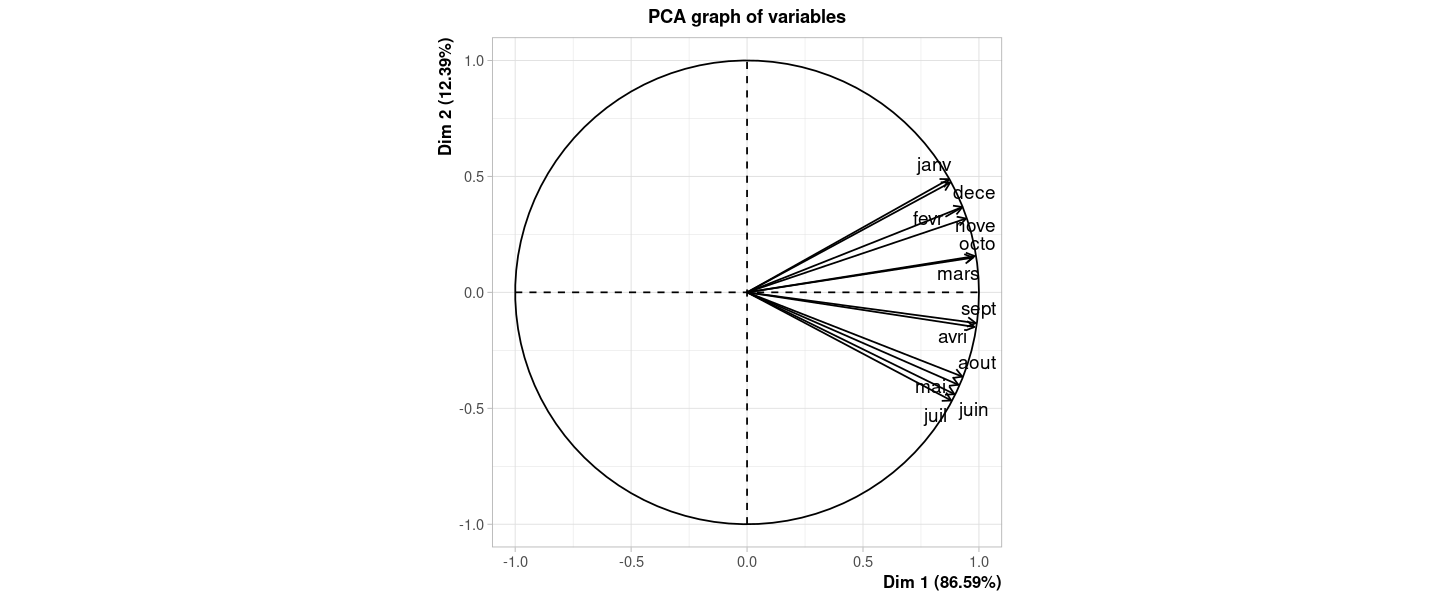

In [9]:
# Representation of the variables (unscaled PCA)
acp <- PCA(temp, scale.unit = TRUE, ncp = 12, graph = F)
plot(acp, axes = c(1, 2), choix = "var")

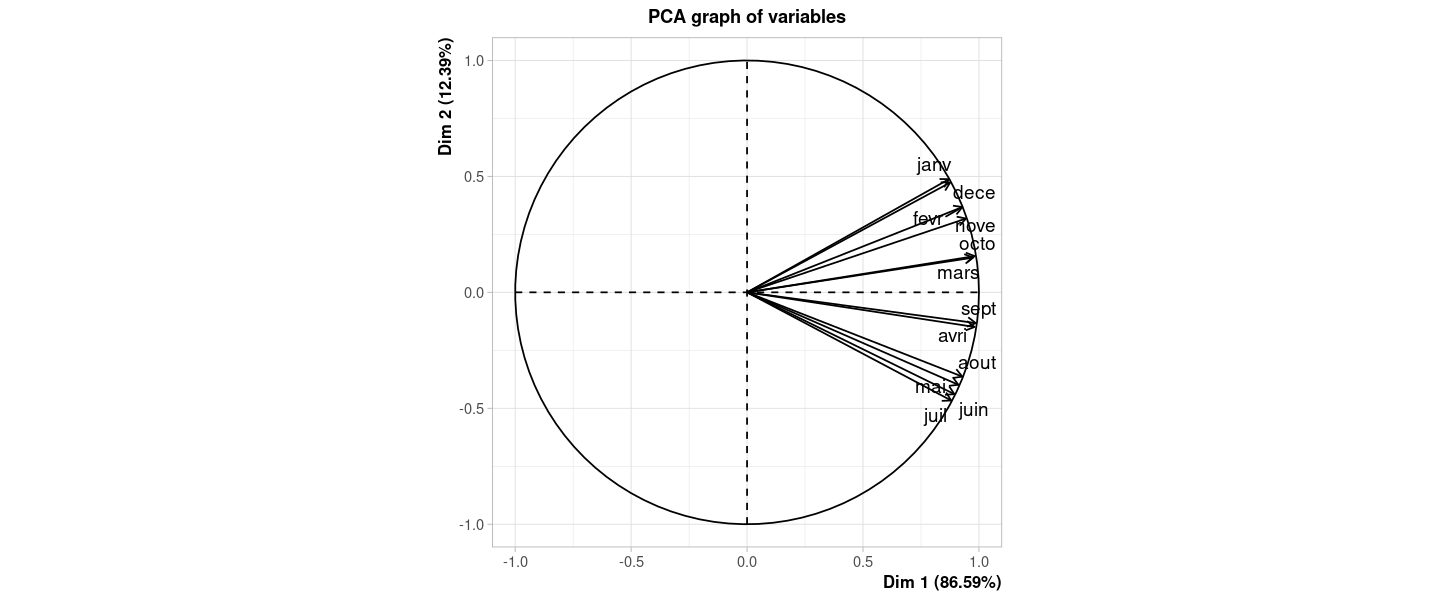

In [10]:
acp <- PCA(temp, scale.unit = TRUE, graph = F)
plot(acp, axes = c(1, 2), choix = "var")


Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


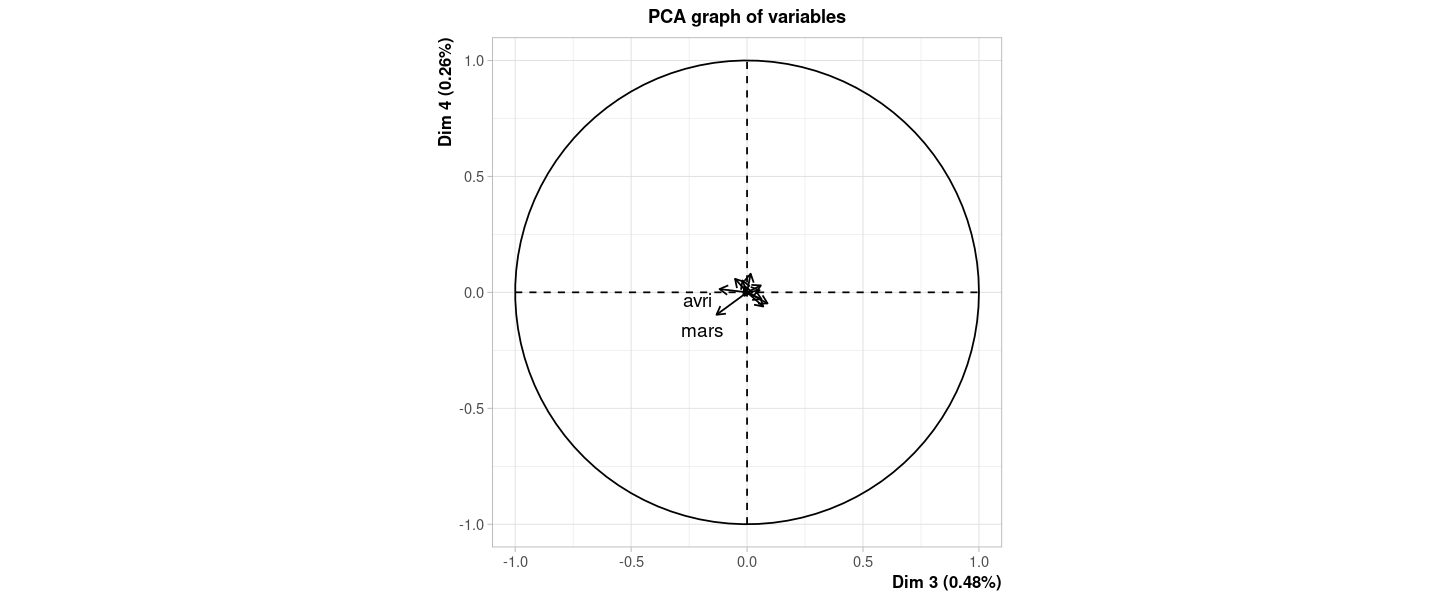

In [11]:
acp <- PCA(temp, scale.unit = TRUE, graph = F)
plot(acp, axes = c(3, 4), choix = "var")

**Q** Why the two representations are very similar?

**Q** Why can we use all the variables to interpret the principal variables 1 and 2? Can you recover the interpretation of the two first axis?

**Q** Draw a similar plot with components 3 and 4. Explain we cannot use that plot to interpret component 3. What can we do else?

Let us now consider the case of the outlier on axis 2 (Brest). Should we keep it in the analysis, or should we remove it because it completely changes the computations (matrix diagonalization, mean, etc.), in particular about the second axis? To address this question, we consider two PCAs, with or without this point.. 

**Q** Look at the code below: How this observation is excluded?

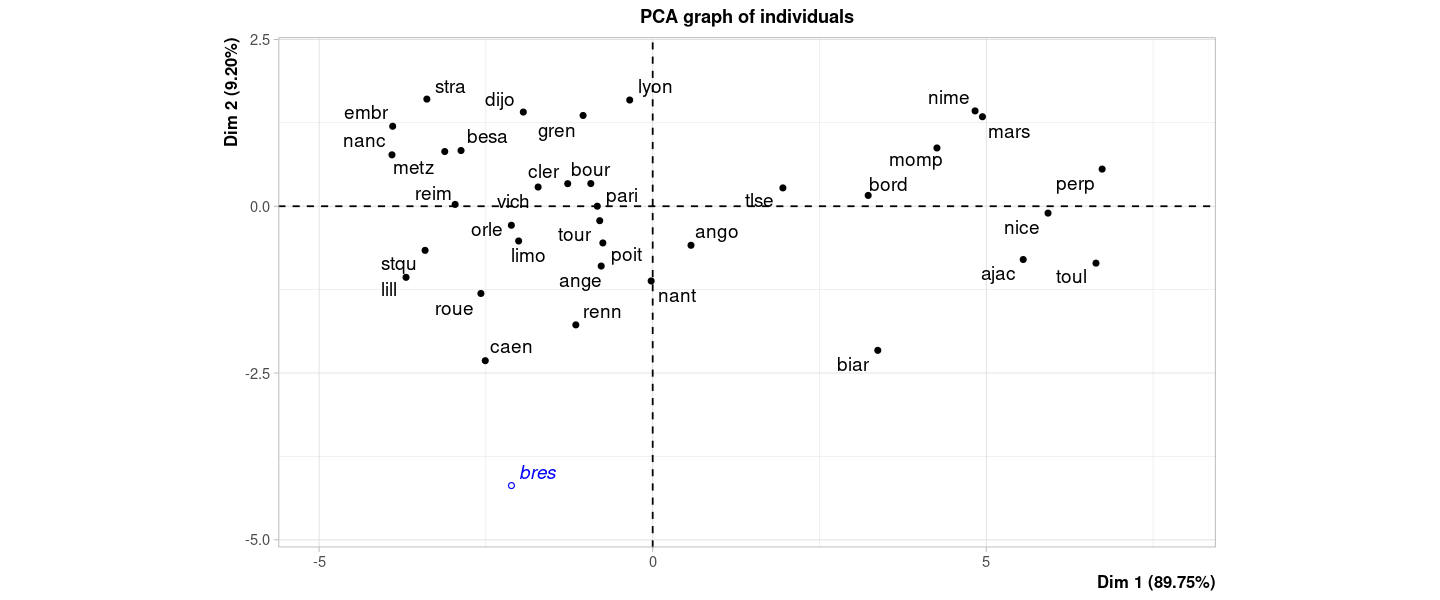

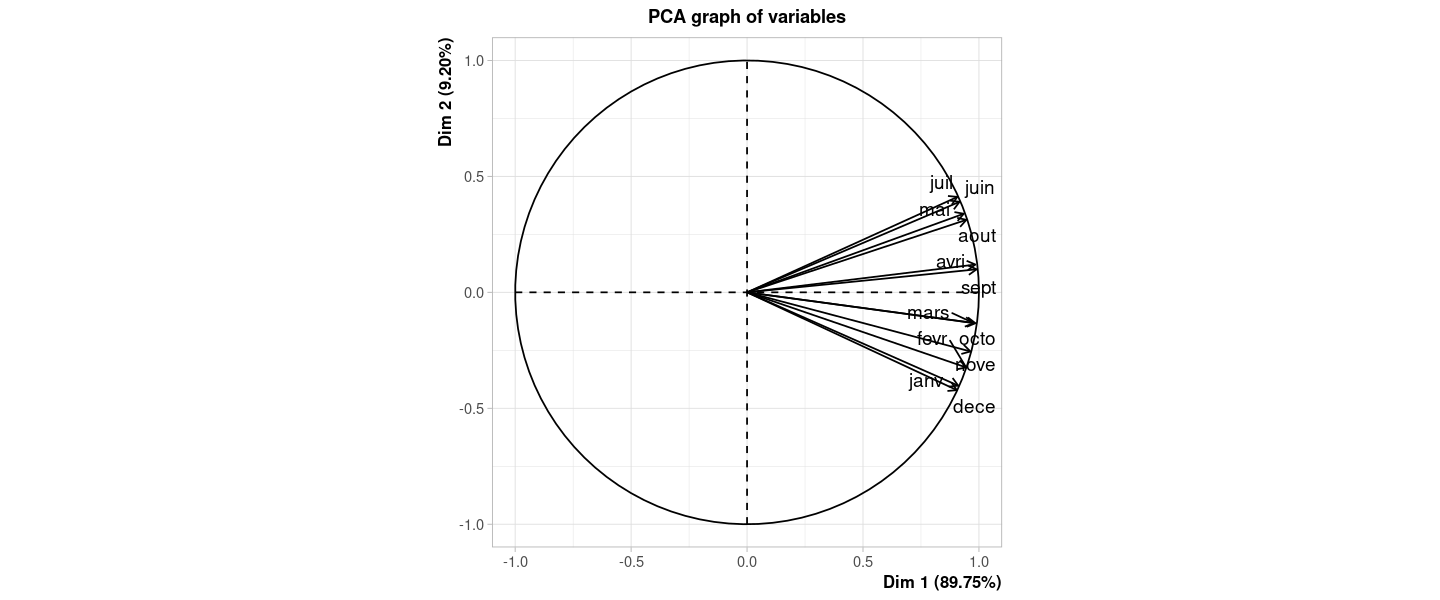

In [12]:
acp <- PCA(temp, scale.unit = TRUE, ncp = 12, graph = F, ind.sup = 8)
plot(acp)
plot(acp, choix = "var")

**Q** Is the interpretation of the axes modified? Conclusion about the outlier?